# LightGBM

* LightGBM.ipynb에서는 train--.csv 와 test--.csv 의 데이터를 그대로 train data와 test 데이터로 사용했었다.
* 그 데이터에 불균형이 많이 발견되었으며, 데이터의 정규화도 이루어지지 않았다.
* 이번에 train, test 데이터를 균등하게 나누어 보고, MinMaxScaler를 사용하여 정규화를 하고, SMOTE를 사용하여 오버샘플링을 해 보았다.
* 결과, 기존에 train accuracy가 0.59, test accuracy가 0.78 였던 것에 비해 train accuracy는 0.95, test accuracy는 0.91 으로 나타났다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/"

# Train-Test 를 라벨 별로 균등하게 나누기 전

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ### 
train_dataset = pd.read_csv(path + 'data_processing/dataset_03/training/train_dataset_with_label_fill_user_mean.csv')
valid_dataset = pd.read_csv(path + 'data_processing/dataset_03/validation/val_dataset_with_label_fill_user_mean.csv')

train_output = train_dataset[['DIAG_NM']]
train_input = train_dataset[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]

test_output = valid_dataset[['DIAG_NM']]
test_input = valid_dataset[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(train_input)
train_input = scaler.fit_transform(train_input)
test_input = scaler.fit_transform(test_input)

In [ ]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

<ipython-input-248-e819ad067ec6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
<ipython-input-248-e819ad067ec6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])


In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=200, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 0.793395
[2]	valid_0's multi_logloss: 0.801557
[3]	valid_0's multi_logloss: 0.806818
[4]	valid_0's multi_logloss: 0.813974
[5]	valid_0's multi_logloss: 0.822926
[6]	valid_0's multi_logloss: 0.829505
[7]	valid_0's multi_logloss: 0.83429
[8]	valid_0's multi_logloss: 0.837816
[9]	valid_0's multi_logloss: 0.844023
[10]	valid_0's multi_logloss: 0.850323
[11]	valid_0's multi_logloss: 0.859463
[12]	valid_0's multi_logloss: 0.862695
[13]	valid_0's multi_logloss: 0.863493
[14]	valid_0's multi_logloss: 0.869248
[15]	valid_0's multi_logloss: 0.872858
[16]	valid_0's multi_logloss: 0.876752
[17]	valid_0's multi_logloss: 0.884423
[18]	valid_0's multi_logloss: 0.889189
[19]	valid_0's multi_logloss: 0.894257
[20]	valid_0's multi_logloss: 0.897532
[21]	valid_0's multi_logloss: 0.90384
[22]	valid_0's multi_logloss: 0.909198
[23]	valid_0's multi_logloss: 0.912066
[24]	valid_0's multi_logloss: 0.915177
[25]	valid_0's multi_logloss: 0.91664
[26]	valid_0's multi_logloss: 0.91922

In [ ]:
# 균등하게 나누기 전
from sklearn.metrics import accuracy_score

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.597212420606916
0.7860560492139439


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
test_pred = LGBM.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7860560492139439
Precision: 0.26201868307131465
Recall: 0.3333333333333333
F1 Score: 0.2934047710167113


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


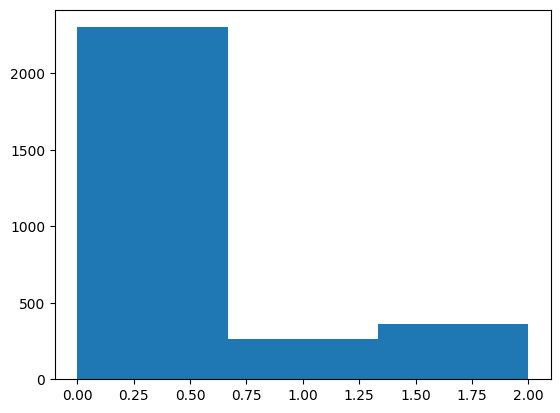

In [ ]:
import matplotlib.pyplot as plt

plt.hist(test_output, bins=3)
plt.show()

(array([   0., 2926.,    0.]),
 array([-0.5       , -0.16666667,  0.16666667,  0.5       ]),
 <BarContainer object of 3 artists>)

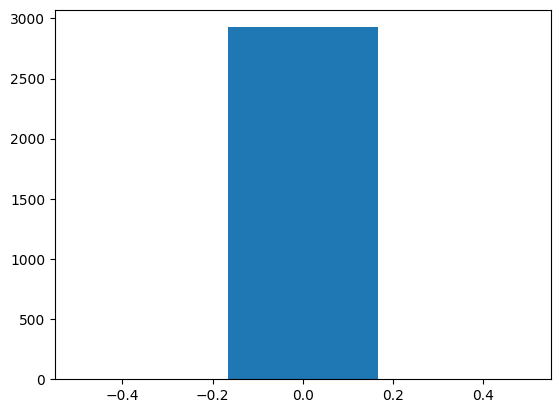

In [ ]:
plt.hist(test_pred, bins=3)

이를 통해, Train-Test를 균등하게 나누기 전에는 모델이 모든 데이터에 대해 하나의 라벨로만 분류하였다는 것을 알 수 있다.

# Train-Test 을 각 라벨 별로 균등하게 나눈 후

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ###
dataset = pd.read_csv('/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/data_processing/dataset_05/dataset_with_label_fill_user_mean.csv')
data_output = dataset[['DIAG_NM']]
# data_input에서 score 가 들어가는 column 등 필요 없는 column 제거
data_input = dataset.drop(['DIAG_NM', 'ID', 'date'], axis=1)
columns_to_drop = [col for col in data_input.columns if 'score' in col]
data_input = data_input[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]
# KeyError: "['sleep_bedtime_end', 'sleep_bedtime_start', 'sleep_hr_5min'] not in index"
#'activity_cal_active', 
#  'activity_met_min_inactive', 'activity_high', 'sleep_efficiency', 'activity_rest', 'activity_met_min_low', 'activity_inactive', 'activity_medium', 'activity_low', 'activity_met_min_medium', 'activity_met_min_high'

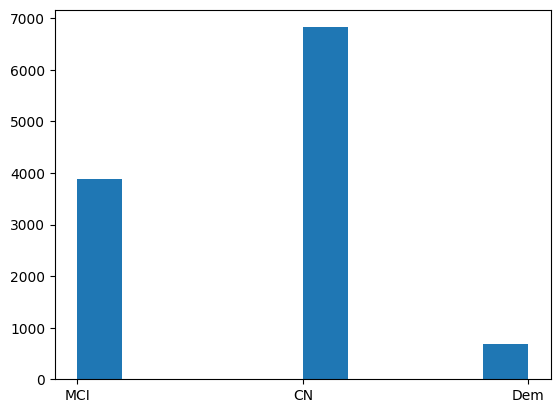

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data_output)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(train_input)
data_input = scaler.fit_transform(data_input)
print(data_input)

[[0.48809524 0.34404743 0.31034483 ... 0.15196599 0.61666667 0.04496453]
 [0.3452381  0.35637385 0.34482759 ... 0.19872476 0.30138889 0.09404402]
 [0.48809524 0.33359338 0.27586207 ... 0.09883103 0.72638889 0.03249105]
 ...
 [0.32142857 0.28257138 0.31034483 ... 0.2848034  0.38888889 0.12132708]
 [0.30952381 0.33608987 0.34482759 ... 0.3246955  0.1        0.11979798]
 [0.29761905 0.27445779 0.27586207 ... 0.25079702 0.13333333 0.04995821]]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(data_input, data_output, test_size=0.2, shuffle=True, stratify=data_output, random_state=42)

In [ ]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=200, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 0.799694
[2]	valid_0's multi_logloss: 0.770445
[3]	valid_0's multi_logloss: 0.747715
[4]	valid_0's multi_logloss: 0.727776
[5]	valid_0's multi_logloss: 0.710803
[6]	valid_0's multi_logloss: 0.69435
[7]	valid_0's multi_logloss: 0.67972
[8]	valid_0's multi_logloss: 0.667242
[9]	valid_0's multi_logloss: 0.656066
[10]	valid_0's multi_logloss: 0.645608
[11]	valid_0's multi_logloss: 0.636569
[12]	valid_0's multi_logloss: 0.628278
[13]	valid_0's multi_logloss: 0.620379
[14]	valid_0's multi_logloss: 0.61281
[15]	valid_0's multi_logloss: 0.606037
[16]	valid_0's multi_logloss: 0.598316
[17]	valid_0's multi_logloss: 0.593211
[18]	valid_0's multi_logloss: 0.585605
[19]	valid_0's multi_logloss: 0.579275
[20]	valid_0's multi_logloss: 0.574746
[21]	valid_0's multi_logloss: 0.569371
[22]	valid_0's multi_logloss: 0.564516
[23]	valid_0's multi_logloss: 0.560714
[24]	valid_0's multi_logloss: 0.556618
[25]	valid_0's multi_logloss: 0.552086
[26]	valid_0's multi_logloss: 0.54831

In [ ]:
# 오버샘플링 전
from sklearn.metrics import accuracy_score

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.9276777875329236
0.7866549604916594


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
test_pred = LGBM.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7866549604916594
Precision: 0.8064685479616706
Recall: 0.7340414455421468
F1 Score: 0.7636371852563455


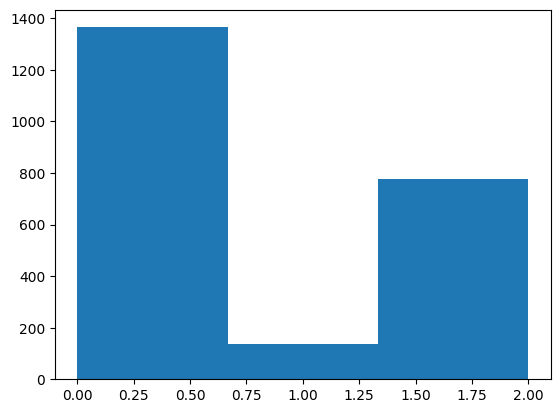

In [ ]:
plt.hist(test_output, bins=3)
plt.show()

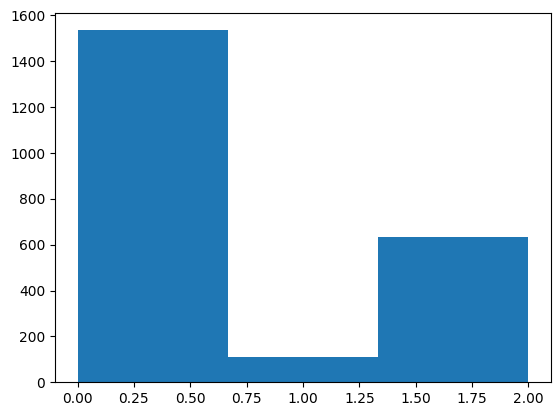

In [ ]:
plt.hist(test_pred, bins=3)
plt.show()

데이터를 균등하게 나눈 후에는 모든 데이터를 같은 라벨로 분류하지는 않지만 데이터 자체의 불균형 때문에 과적합 되어 있음을 볼 수 있다.

# SMOTE를 사용한 오버샘플링


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ###
dataset = pd.read_csv('/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/data_processing/dataset_05/dataset_with_label_fill_user_mean.csv')
data_output = dataset[['DIAG_NM']]
# data_input에서 score 가 들어가는 column 등 필요 없는 column 제거
data_input = dataset.drop(['DIAG_NM', 'ID', 'date'], axis=1)
columns_to_drop = [col for col in data_input.columns if 'score' in col]
data_input = data_input[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]
# KeyError: "['sleep_bedtime_end', 'sleep_bedtime_start', 'sleep_hr_5min'] not in index"
#'activity_cal_active', 
#  'activity_met_min_inactive', 'activity_high', 'sleep_efficiency', 'activity_rest', 'activity_met_min_low', 'activity_inactive', 'activity_medium', 'activity_low', 'activity_met_min_medium', 'activity_met_min_high'

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(data_input, data_output, test_size=0.2, shuffle=True, stratify=data_output, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_fit = scaler.fit(train_input)
train_input = scaler_fit.transform(train_input)

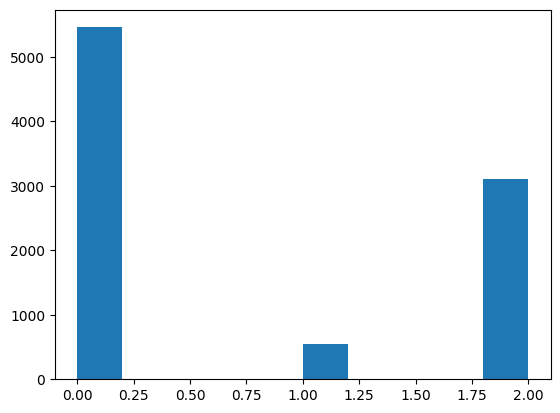

In [ ]:
# 오버샘플링 전
plt.hist(train_output)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=32)

train_input, train_output = sm.fit_resample(train_input, train_output)

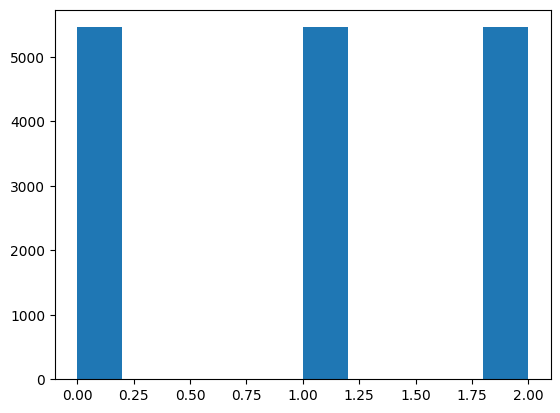

In [ ]:
# 오버샘플링 후
plt.hist(train_output)
plt.show()

In [ ]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder = encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

test_input = scaler_fit.transform(test_input)

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=200, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 1.05088
[2]	valid_0's multi_logloss: 1.01324
[3]	valid_0's multi_logloss: 0.97968
[4]	valid_0's multi_logloss: 0.951253
[5]	valid_0's multi_logloss: 0.924379
[6]	valid_0's multi_logloss: 0.90112
[7]	valid_0's multi_logloss: 0.881015
[8]	valid_0's multi_logloss: 0.861674
[9]	valid_0's multi_logloss: 0.840549
[10]	valid_0's multi_logloss: 0.823197
[11]	valid_0's multi_logloss: 0.806242
[12]	valid_0's multi_logloss: 0.792459
[13]	valid_0's multi_logloss: 0.77932
[14]	valid_0's multi_logloss: 0.765024
[15]	valid_0's multi_logloss: 0.752822
[16]	valid_0's multi_logloss: 0.741113
[17]	valid_0's multi_logloss: 0.732048
[18]	valid_0's multi_logloss: 0.721717
[19]	valid_0's multi_logloss: 0.712412
[20]	valid_0's multi_logloss: 0.70277
[21]	valid_0's multi_logloss: 0.693402
[22]	valid_0's multi_logloss: 0.685686
[23]	valid_0's multi_logloss: 0.678257
[24]	valid_0's multi_logloss: 0.672293
[25]	valid_0's multi_logloss: 0.666067
[26]	valid_0's multi_logloss: 0.660179
[

In [ ]:

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.9418696953043904
0.7704126426690079


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
test_pred = LGBM.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7704126426690079
Precision: 0.7282679357125437
Recall: 0.7679857247318678
F1 Score: 0.7460160196972794


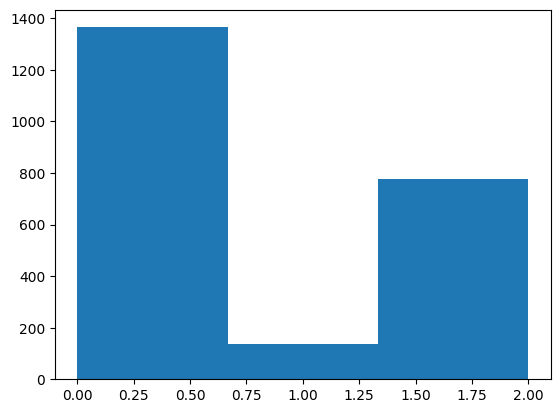

In [ ]:
plt.hist(test_output, 3)
plt.show()

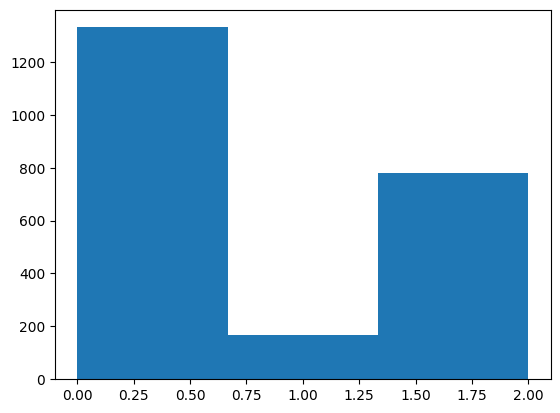

In [ ]:
plt.hist(test_pred, 3)
plt.show()

SMOTE를 사용하여 데이터 불균형 문제를 해결했지만 accuracy가 오히려 떨어지는 문제가 발생하였습니다.

# 클래스 가중치 설정

SMOTE를 사용해도 성능이 높아지지 않아서 SMOTE적용을 하지 않고 클래스 가중치를 설정하여 데이터 불균형을 해결하고자 하였습니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ###
dataset = pd.read_csv('/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/data_processing/dataset_05/dataset_with_label_fill_user_mean.csv')
data_output = dataset[['DIAG_NM']]
# data_input에서 score 가 들어가는 column 등 필요 없는 column 제거
data_input = dataset.drop(['DIAG_NM', 'ID', 'date'], axis=1)
columns_to_drop = [col for col in data_input.columns if 'score' in col]
data_input = data_input[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]
# KeyError: "['sleep_bedtime_end', 'sleep_bedtime_start', 'sleep_hr_5min'] not in index"
#'activity_cal_active', 
#  'activity_met_min_inactive', 'activity_high', 'sleep_efficiency', 'activity_rest', 'activity_met_min_low', 'activity_inactive', 'activity_medium', 'activity_low', 'activity_met_min_medium', 'activity_met_min_high'

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(data_input, data_output, test_size=0.2, shuffle=True, stratify=data_output, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_fit = scaler.fit(train_input)
train_input = scaler_fit.transform(train_input)

In [ ]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder = encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

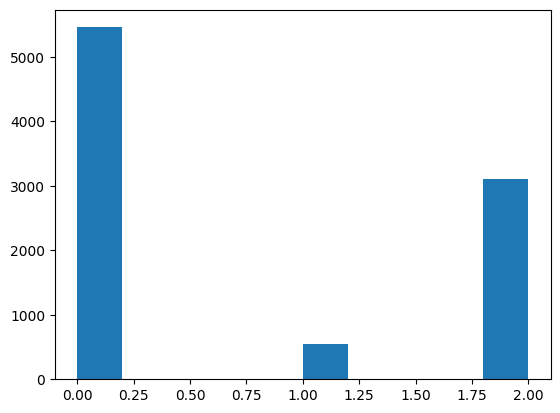

In [ ]:
plt.hist(train_output)
plt.show()

In [ ]:
from collections import Counter

class_counts = dict(Counter(train_output['DIAG_NM']))
total_samples = sum(class_counts.values())
class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}
print(total_samples)
print(class_counts)
print(class_weights)

9112
{0: 5459, 1: 550, 2: 3103}
{0: 1.6691701776882213, 1: 16.567272727272726, 2: 2.9365130518852722}


In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

test_input = scaler_fit.transform(test_input)

LGBM = LGBMClassifier(class_weight=class_weights)
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=200, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 1.05404
[2]	valid_0's multi_logloss: 1.0185
[3]	valid_0's multi_logloss: 0.987215
[4]	valid_0's multi_logloss: 0.959508
[5]	valid_0's multi_logloss: 0.934115
[6]	valid_0's multi_logloss: 0.911051
[7]	valid_0's multi_logloss: 0.891007
[8]	valid_0's multi_logloss: 0.872504
[9]	valid_0's multi_logloss: 0.854473
[10]	valid_0's multi_logloss: 0.838153
[11]	valid_0's multi_logloss: 0.821825
[12]	valid_0's multi_logloss: 0.805884
[13]	valid_0's multi_logloss: 0.791297
[14]	valid_0's multi_logloss: 0.778304
[15]	valid_0's multi_logloss: 0.766992
[16]	valid_0's multi_logloss: 0.756571
[17]	valid_0's multi_logloss: 0.745995
[18]	valid_0's multi_logloss: 0.735117
[19]	valid_0's multi_logloss: 0.725534
[20]	valid_0's multi_logloss: 0.716203
[21]	valid_0's multi_logloss: 0.7081
[22]	valid_0's multi_logloss: 0.699646
[23]	valid_0's multi_logloss: 0.691685
[24]	valid_0's multi_logloss: 0.683728
[25]	valid_0's multi_logloss: 0.676773
[26]	valid_0's multi_logloss: 0.670195


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
test_pred = LGBM.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7673397717295873
Precision: 0.7399033940895526
Recall: 0.7820258345363534
F1 Score: 0.7581407749395169


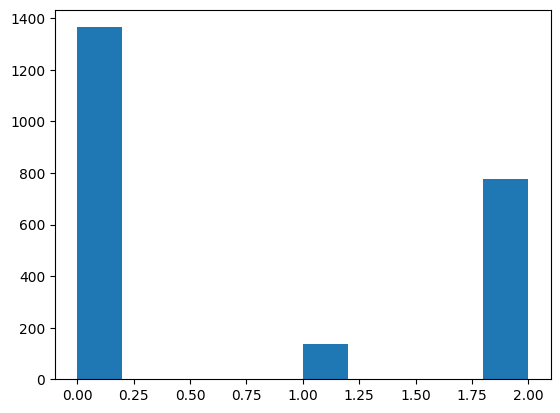

In [ ]:
plt.hist(test_output)
plt.show()

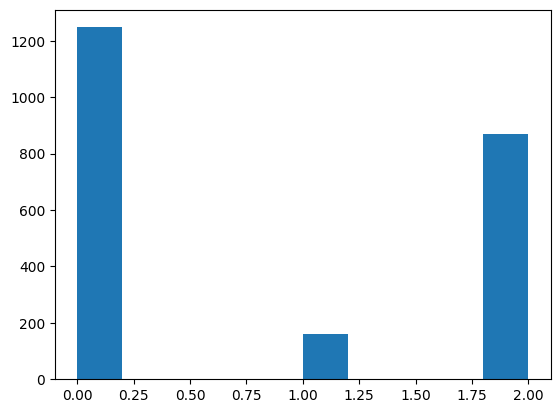

In [ ]:
plt.hist(test_pred)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

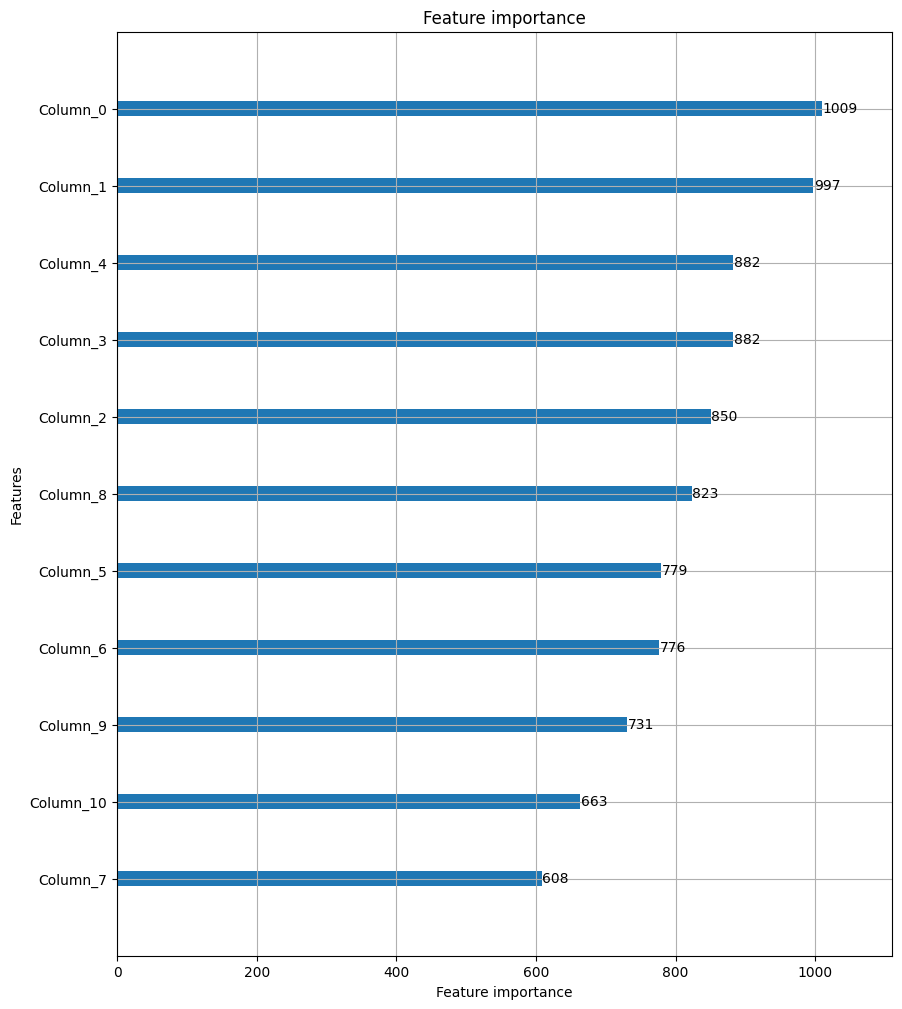

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LGBM, ax=ax)
plt.show

# 모델 저장 및 복원

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ### 
valid_dataset = pd.read_csv(path + 'data_processing/dataset_03/validation/val_dataset_with_label_fill_user_mean.csv')

test_output = valid_dataset[['DIAG_NM']]
test_input = valid_dataset[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_restless', 'sleep_midpoint_at_delta', 'activity_cal_total', 'activity_met_min_inactive', 'activity_met_min_high', 'activity_score_meet_daily_targets', 'sleep_rem', 'sleep_light', 'activity_low', 'activity_rest', 'activity_met_min_medium']]

In [ ]:
# 이때, loaded_model.predict() 에서 사용하는 데이터 역시 MinMaxScaler를 통한 정규화를 거쳐야 한다. 

In [ ]:
import joblib

joblib.dump(scaler_fit, '/content/drive/MyDrive/빅데이터 팀플/model/lgbm_scaler.pkl')

['/content/drive/MyDrive/빅데이터 팀플/model/lgbm_scaler.pkl']

In [ ]:
import joblib

loaded_scaler = joblib.load('/content/drive/MyDrive/빅데이터 팀플/model/lgbm_scaler.pkl')

In [ ]:
# 이제 LGBM 모델을 저장하고 복원해 예측에 사용해보자. 

In [ ]:
import joblib

joblib.dump(LGBM, '/content/drive/MyDrive/빅데이터 팀플/model/lgbm_model.pkl')

['/content/drive/MyDrive/빅데이터 팀플/model/lgbm_model.pkl']

In [ ]:
import joblib

loaded_scaler = joblib.load('/content/drive/MyDrive/빅데이터 팀플/model/lgbm_scaler.pkl')
loaded_model = joblib.load('/content/drive/MyDrive/빅데이터 팀플/model/lgbm_model.pkl')

for k in range(2926):
  pred = loaded_model.predict(loaded_scaler.transform(test_input[k:k+1]))
  if k % 100 == 0 and k >= 2400: # 몇 개만 출력해 확인
    print(pred)
    print(test_output[k:k+1]['DIAG_NM'])
# CN : 0, Dem : 1, MCI : 2

[1]
2400    Dem
Name: DIAG_NM, dtype: object
[0]
2500    CN
Name: DIAG_NM, dtype: object
[0]
2600    CN
Name: DIAG_NM, dtype: object
[2]
2700    MCI
Name: DIAG_NM, dtype: object
[0]
2800    CN
Name: DIAG_NM, dtype: object
[0]
2900    CN
Name: DIAG_NM, dtype: object
